In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize
plt.rc('font',size=18)
plt.rc('legend',fontsize=14)

Text(0, 0.5, 'Percent populations')

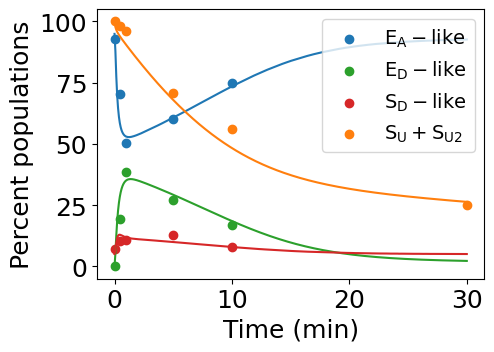

In [31]:
c_p0=1e-6
c_su0=10e-6
c_u0=20e-6

k_su2p=8.500e3  *60
k_su2m=1.785e-1  *60

k_sup=5.950e2  *60
k_sum=1.785e-1  *60

k_ip=1.250e-1  *60
k_im=1.000e-3  *60

k_dp=6.364e-2  *60
k_dm=1.000e-3  *60

k_hp=2.968e-2  *60
k_hm=1.000e-3  *60

k_sp=1.000e-3  *60
k_sm=8.925e-2  *60

k_up=1.000e-3  *60
k_um=5.625e-1  *60

k_tp=5.400e-1  *60
k_tm=10.125  *60

K_u=k_tm/k_tp

def func(t,y):
    c_pd,c_pdsu2,c_pdsu,c_pdusui,c_pdusi,c_pdu,c_pdusu,c_pdt,c_su2,c_su,c_u=y
    return [
        (k_su2m*c_pdsu2 - k_su2p*c_su0*c_su2*c_pd) + (k_sum*c_pdsu - k_sup*c_su0*c_su*c_pd) + (k_um*c_pdu - k_up*c_u*c_u0*c_pd) + (k_tm*c_pdt - k_tp*c_pd),
        (k_su2p*c_su0*c_su2*c_pd - k_su2m*c_pdsu2) + (k_im*c_pdusui - k_ip*c_pdsu2) + (k_dm*c_pdusu - k_dp*c_pdsu2),
        (k_sup*c_su0*c_su*c_pd - k_sum*c_pdsu) + (k_im*c_pdusi - k_ip*c_pdsu),
        (k_ip*c_pdsu2 - k_im*c_pdusui) + (k_hm*c_pdu - k_hp*c_pdusui),
        (k_ip*c_pdsu - k_im*c_pdusi) + (k_hm*c_pdu - k_hp*c_pdusi),
        (k_hp*c_pdusui - k_hm*c_pdu) + (k_hp*c_pdusi - k_hm*c_pdu) + (k_sm*c_pdusu - k_sp*c_su*c_su0*c_pdu) + (k_up*c_u*c_u0*c_pd - k_um*c_pdu),
        (k_dp*c_pdsu2 - k_dm*c_pdusu) + (k_sp*c_su*c_su0*c_pdu - k_sm*c_pdusu),
        (k_tp*c_pd - k_tm*c_pdt),
        (k_su2m*c_pdsu2*c_p0/c_su0 - k_su2p*c_su2*c_pd*c_p0),
        (k_sum*c_pdsu*c_p0/c_su0 - k_sup*c_su*c_pd*c_p0) + (k_sm*c_pdusu*c_p0/c_su0 - k_sp*c_su*c_pdu*c_p0),
        (k_um*c_pdu*c_p0/c_u0 - k_up*c_u*c_pd*c_p0)
    ]

result1=integrate.solve_ivp(func,(0,30),(K_u/(1+K_u),0.0,0.0,0.0,0.0,0.0,0.0,1/(1+K_u),1.0,0.0,0.0),t_eval=np.linspace(0,30,400))

color1='tab:blue'
color2='tab:green'
color3='tab:red'
color4='tab:orange'

plt.figure(figsize=(5,3.5))
plt.plot(result1.t,(result1.y[0]+result1.y[1]+result1.y[2])*100,color=color1)
plt.plot(result1.t,(result1.y[3]+result1.y[4])*100,color=color2)
plt.plot(result1.t,(result1.y[5]+result1.y[6]+result1.y[7])*100,color=color3)
plt.plot(result1.t,(result1.y[-2]+result1.y[-3])*100,color=color4)
plt.scatter([0.0,0.5,1.0,5.0,10.0],np.array([0.929,0.705,0.506,0.602,0.749])*100,color=color1,label=r'$\rm E_A-like$')
plt.scatter([0.0,0.5,1.0,5.0,10.0],np.array([0.000,0.193,0.387,0.270,0.170])*100,color=color2,label=r'$\rm E_D-like$')
plt.scatter([0.0,0.5,1.0,5.0,10.0],np.array([0.071,0.102,0.107,0.128,0.081])*100,color=color3,label=r'$\rm S_D-like$')
plt.scatter([0.0,0.5,1.0,5.0,10.0,30.0],np.array([1.0,0.98,0.96,0.71,0.56,0.25])*100,color=color4,label=r'$\rm S_{U}+S_{U2}$')
plt.legend(loc='upper right')

plt.xlabel('Time (min)')
plt.ylabel('Percent populations')

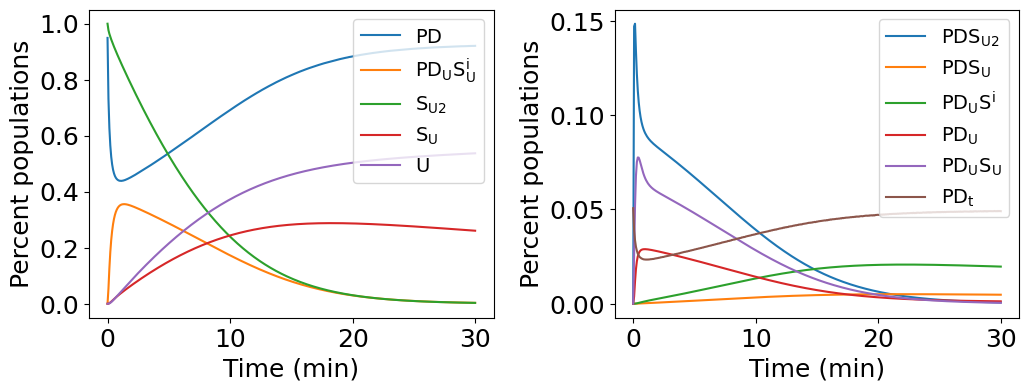

In [3]:
labels=[r'$\rm PD$',r'$\rm PDS_{U2}$',r'$\rm PDS_U$',r'$\rm PD_US_U^i$',r'$\rm PD_US^i$',r'$\rm PD_U$',r'$\rm PD_US_U$',r'$\rm PD_t$',r'$\rm S_{U2}$',r'$\rm S_U$',r'$\rm U$']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in [0,3,8,9,10]:
    plt.plot(result1.t,result1.y[i],label=labels[i])
plt.legend(loc='upper right')
plt.xlabel('Time (min)')
plt.ylabel('Percent populations')

plt.subplot(1,2,2)
for i in [1,2,4,5,6,7]:
    plt.plot(result1.t,result1.y[i],label=labels[i])
plt.legend(loc='upper right')
plt.xlabel('Time (min)')
plt.ylabel('Percent populations')

plt.subplots_adjust(wspace=0.3)

In [4]:
datas=np.array([
    [28.9,25.8,34.5,40.1],
    [27.0,13.8,18.1,30.8],
    [14.6,11.2,7.6,3.8],
    [3.8,3.1,4.4,4.1],
    [1.8,1.6,2.4,0.7],
    [2.2,3.0,3.6,1.9],
    [2.4,2.8,2.5,1.5],
    [0.5,1.1,0.8,0.2],
    [0.6,1.2,1.0,0.5],
    [3.9,6.1,4.9,2.8],
    [3.3,4.2,3.2,1.6],
    [6.5,15.0,9.2,8.2],
    [4.6,11.3,8.0,3.7]
])
names=[r'$E_{A1}^{UBL}$',
       r'$E_{A2.0}^{UBL}$',
       r'$E_{A2.1}^{UBL}$',
       r'$S_{B}^{USP14}$',
       r'$S_{C}^{USP14}$',
       r'$S_{D4}^{USP14}$',
       r'$S_{D5}^{USP14}$',
       r'$E_{D4}^{USP14}$',
       r'$E_{D5}^{USP14}$',
       r'$E_{D0}^{USP14}$',
       r'$E_{D1}^{USP14}$',
       r'$E_{D2.0}^{USP14}$',
       r'$E_{D2.1}^{USP14}$']

Text(0, 0.5, 'Percent populations')

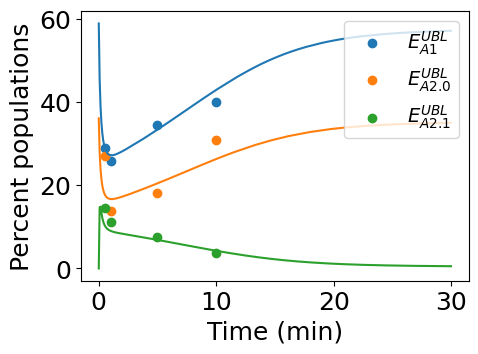

In [5]:
plt.figure(figsize=(5,3.5))
for i in range(0,3):
    plt.scatter([0.5,1.0,5.0,10.0],datas[i],label=names[i])
plt.legend(loc='upper right')

plt.plot(result1.t,(result1.y[0]*0.62)*100)
plt.plot(result1.t,(result1.y[0]*0.38)*100)
plt.plot(result1.t,(result1.y[1]+result1.y[2])*100)

plt.xlabel('Time (min)')
plt.ylabel('Percent populations')

Text(0, 0.5, 'Percent populations')

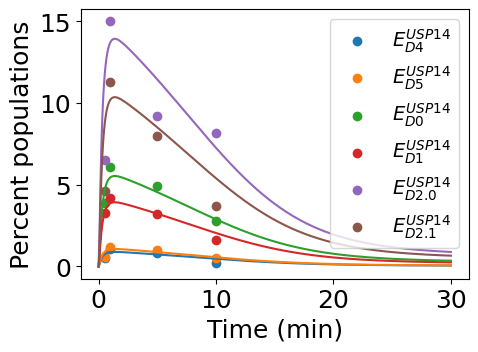

In [6]:
plt.figure(figsize=(5,3.5))
for i in range(7,13):
    plt.scatter([0.5,1.0,5.0,10.0],datas[i],label=names[i])
plt.legend()

plt.plot(result1.t,(result1.y[3]+result1.y[4])*0.025*100,color='tab:blue')
plt.plot(result1.t,(result1.y[3]+result1.y[4])*0.03*100,color='tab:orange')
plt.plot(result1.t,(result1.y[3]+result1.y[4])*0.155*100,color='tab:green')
plt.plot(result1.t,(result1.y[3]+result1.y[4])*0.11*100,color='tab:red')
plt.plot(result1.t,(result1.y[3]+result1.y[4])*0.39*100,color='tab:purple')
plt.plot(result1.t,(result1.y[3]+result1.y[4])*0.29*100,color='tab:brown')

plt.xlabel('Time (min)')
plt.ylabel('Percent populations')

Text(0, 0.5, 'Percent populations')

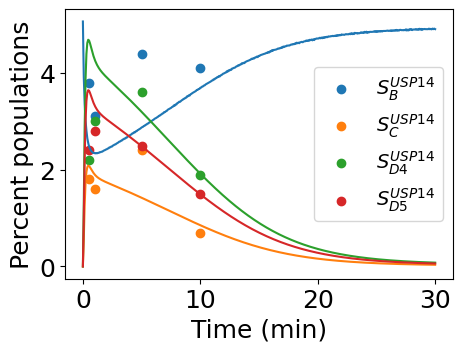

In [7]:
plt.figure(figsize=(5,3.5))

plt.plot(result1.t,result1.y[7]*100,color='tab:blue')
plt.plot(result1.t,(result1.y[5]+result1.y[6])*0.2*100,color='tab:orange')
plt.plot(result1.t,(result1.y[5]+result1.y[6])*0.45*100,color='tab:green')
plt.plot(result1.t,(result1.y[5]+result1.y[6])*0.35*100,color='tab:red')

for i in range(3,7):
    plt.scatter([0.5,1.0,5.0,10.0],datas[i],label=names[i])
plt.legend()

plt.xlabel('Time (min)')
plt.ylabel('Percent populations')

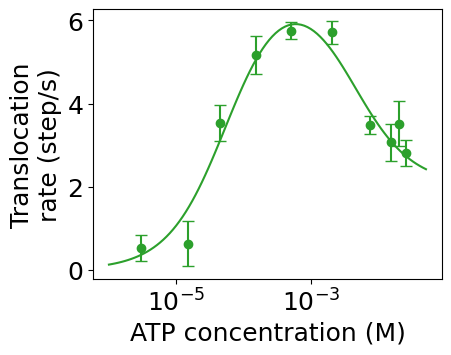

In [8]:
c_atps_exp=np.array([3e-6,1.5e-5,4.5e-5,1.5e-4,5e-4,2e-3,7.5e-3,1.5e-2,2e-2,2.5e-2])
curve_atps_exp=np.array([1.0581,1.2448,7.0643,10.3320,11.5145,11.4212,6.9710,6.1307,7.0332,5.6017])/2
err_atps_exp=np.array([0.6287,1.0778,0.8683,0.8992,0.3892,0.5389,0.4491,0.8982,1.0778,0.6287])/2

plt.figure(figsize=(4.5,3.5))
plt.scatter(c_atps_exp,curve_atps_exp,color='tab:green',label='Experiment')
plt.errorbar(c_atps_exp,curve_atps_exp,err_atps_exp,capsize=4,color='tab:green',linestyle='none')
plt.xscale('log')
plt.xlabel('ATP concentration (M)')
plt.ylabel('Translocation\nrate (step/s)')

r_trans=lambda c_atp,v1,v2,k1,k2:v1*c_atp/(k1+c_atp)-v2*c_atp/(k2+c_atp)
paras,_=optimize.curve_fit(r_trans,c_atps_exp,curve_atps_exp,sigma=err_atps_exp)

c_atps=np.geomspace(1e-6,5e-2,100)
temps=r_trans(c_atps,*paras)
plt.plot(c_atps,temps,color='tab:green')

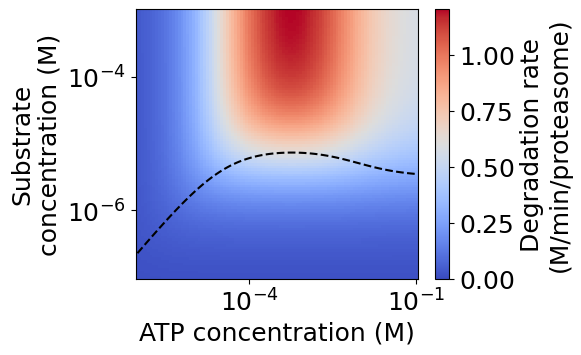

In [9]:
c_subs=np.geomspace(1e-7,1e-3,100)
c_atps=np.geomspace(1e-6,1e-1,100)
k_hps=r_trans(c_atps,*paras)/r_trans(1e-3,*paras)*k_hp
k_hp_grid,c_sub_grid=np.meshgrid(k_hps,c_subs)

vmax=1/(1/k_ip+1/k_hp_grid+1/k_um+k_dp/k_ip*(1/k_um+1/k_sm))
K=(k_hp_grid*k_sm*k_um*(k_dp+k_ip+k_su2m)*(k_tm+k_tp))/(k_su2p*k_tm*(k_ip*k_sm*k_um+k_hp_grid*k_sm*(k_ip+k_um)+k_dp*k_hp_grid*(k_sm+k_um)))
v=vmax*c_sub_grid/(c_sub_grid+K)

plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.pcolor(c_atps,c_subs,v,cmap='coolwarm',vmin=0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('ATP concentration (M)')
plt.ylabel('Substrate\nconcentration (M)')
cbar=plt.colorbar()
cbar.formatter.set_powerlimits((0,0))
cbar.formatter.set_useMathText(True)
cbar.set_label('Degradation rate\n(M/min/proteasome)')

plt.plot(c_atps,K[0,:],color='black',linestyle='--')

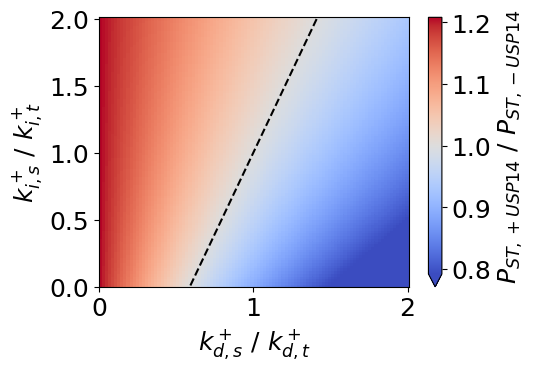

In [10]:
k_dp_s,k_ip_s=np.mgrid[0.01*k_dp:2*k_dp:100j,0.01*k_ip:2*k_ip:100j]
k_dp_t,k_ip_t=k_dp,k_ip
pst_wd=(1/k_su2p*(1+k_dp_t/k_ip_t)+k_su2m/(k_ip_t*k_su2p)) / (1/k_su2p*(1+k_dp_s/k_ip_s)+k_su2m/(k_ip_s*k_su2p))
pst_wod=(1/k_su2p+k_su2m/(k_ip_t*k_su2p))/(1/k_su2p+k_su2m/(k_ip_s*k_su2p))

y=np.linspace(0.01,2,100)
x=k_ip_t/(k_ip_t+k_su2m)*(y+k_su2m/k_ip_t)

plt.figure(figsize=(5,3.5))
plt.pcolor(k_dp_s/k_dp_t,k_ip_s/k_ip_t,pst_wd/pst_wod,cmap='coolwarm',vmin=2-np.max(pst_wd/pst_wod))
plt.plot(x,y,color='black',linestyle='--')
plt.xlabel(r'$k_{d,s}^+\ /\ k_{d,t}^+$')
plt.ylabel(r'$k_{i,s}^+\ /\ k_{i,t}^+$')
cbar=plt.colorbar(extend='min')
cbar.set_label(r'$P_{ST,+USP14}\ /\ P_{ST,-USP14}$')

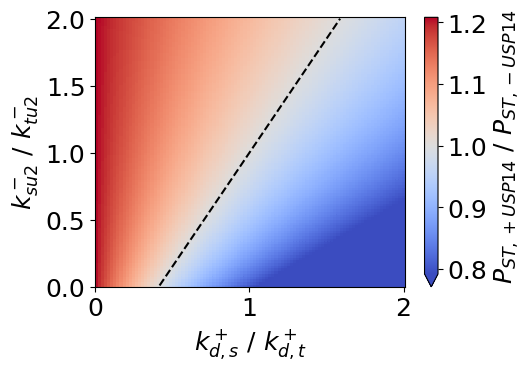

In [11]:
k_dp_s,k_su2m_tmp=np.mgrid[0.01*k_dp:2*k_dp:100j,0.01*k_su2m:2*k_su2m:100j]
k_dp_t,k_tu2m_tmp=k_dp,k_su2m
pst_wd=(1/k_su2p*(1+k_dp_t/k_ip)+k_tu2m_tmp/(k_ip*k_su2p)) / (1/k_su2p*(1+k_dp_s/k_ip)+k_su2m_tmp/(k_ip*k_su2p))
pst_wod=(1/k_su2p+k_tu2m_tmp/(k_ip*k_su2p))/(1/k_su2p+k_su2m_tmp/(k_ip*k_su2p))

y=np.linspace(0.01,2,100)
x=k_tu2m_tmp/(k_ip+k_tu2m_tmp)*(y+k_ip/k_tu2m_tmp)

plt.figure(figsize=(5,3.5))
plt.pcolor(k_dp_s/k_dp_t,k_su2m_tmp/k_tu2m_tmp,pst_wd/pst_wod,cmap='coolwarm',vmin=2-np.max(pst_wd/pst_wod))
plt.plot(x,y,color='black',linestyle='--')
plt.xlabel(r'$k_{d,s}^+\ /\ k_{d,t}^+$')
plt.ylabel(r'$k_{su2}^-\ /\ k_{tu2}^-$')
cbar=plt.colorbar(extend='min')
cbar.set_label(r'$P_{ST,+USP14}\ /\ P_{ST,-USP14}$')